<img alt="header title" width="100%" src="https://github.com/angeloBuso/angeloBuso/blob/main/image/Imagem2.jpg?raw=true">

<img alt = "qr-code" align = "right" width="10%" src="https://github.com/angeloBuso/angeloBuso/blob/main/image/angelobuso.png?raw=true">


# Template Padrão para EDA - *Data Understanding*  <a class="anchor" id="0.1"></a>

# **Índice**
1.	[Compreensão Problema de Negócio](#1)
    - 1.1. [Dicionário dados](#1.1)
2.	[Coleta Dados](#2)
    - 2.1. [Carga dados](#2.1)
3.	[Análise Exploratória](#3)
    - 3.1 [Visão Geral dataSet](#3.1)
        - a     [Pandas Profile Report](#a)
    - 3.2 [Visão Geral & Visual dataSet](#3.2)
    - 3.3 [Pré-Processamento](#3.3)
    - 3.4 [Reshape](#3.4)
        - 3.4.1 [Pré-processamento dos dados etapa de ETL - limpeza e transformação](#3.4.1)
        - 3.4.2 [Limpeza Dados](#3.4.2)
        - 3.4.3 [Transformações dos dados](#3.4.3)
    - 3.5 [EDA - Invidual dos dados](#3.5)
4. [Pré-Processamento dados](#4)
    - 4.1 [Transformação de Atributos](#4.1)
    - 4.2 [Feature Scaling](#4.2)
        - 4.2.1 [Logarítmo](#4.2.1)
        - 4.2.2 [Nomalização](#4.2.2)
            - 4.2.2.1 [MinMaxScaler](#4.2.2.1)
            - 4.2.2.2 [Normalizer](#4.2.2.2)
            - 4.2.2.3 [Pela média dataSet](#4.2.2.3)
        - 4.2.3 [Padronização](#4.2.3)
        - 4.2.4 [Binarização](#4.2.4)
    - 4.3 [Feature Engineer](#4.3)
        - 4.3.1 [Dummies](#4.3.1)
        - 4.3.2 [Imputação Missing](#4.3.2)
    - 4.4 [Feature Selection - Dimensionalidade](#4.4)
        - 4.4.1 [Seleção Univariada](#4.4.1)
            - 4.4.1.1 [SelectKBest](#4.4.1.1)
            - 4.4.1.2 [RFE](#4.4.1.2)
        - 4.4.2 [Regularização](#4.4.2)
        - 4.4.3 [PCA](#4.4.3)
        - 4.4.4 [Métodos Ensembles](#4.4.4)
    - 4.5 [Split dados](#4.5)
        - 4.5.1 [Estático - nível linha](#4.5.1)
        - 4.5.2 [Cross Validation - K folds](#4.5.2) 
5. [Seleção Algoritmo](#5)
    - 5.1. [(i) Individualizado (split estático)](#5.1.i)
        - 5.1.1 [Modelo](#5.1.1.i)
        - 5.1.2 [Fit do Modelo](#5.1.2.i)
        - 5.1.3 [Predict do Modelo](#5.1.3.i)
        - 5.1.4 [Score do Modelo](#5.1.4.i)
    - 5.1. [(ii) Automatizado (split randômico)](#5.1.ii)
        - 5.1.1 [ identificar os estimadores (dentro do mesmo tipo de problema)](#5.1.1.ii)
        - 5.1.2 [cross-Validation (.fit/.predict/.score)](#5.1.2.ii)
    - 5.2. [Algoritmos tipos ensembles (split randômico](#5.2)
        - 5.2.1 [identificar os estimadores ensemble](#5.2.1)
        - 5.2.2 [cross-Validation (.fit/.predict/.score)](#5.2.2)
6. [Otimização Modelo](#6)
    - 6.1. [Grid Search Parameter Tuning](#6.1)
    - 6.2. [Random Search Parameter Tuning](#6.2)
7. [Otimizando Performance Algoritmos Ensemble](#7)
8. [Salvando Modelo Treinado](#8)

In [1]:
#!pip install pandas_profiling

# ctrl & / (do númerico) comenta tudo

In [2]:
# Importação dos pacotes a ser usado no projeto:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import warnings

# configurações notebook
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Consultar diretórios
!dir

 O volume na unidade E ‚ DataScience
 O N£mero de S‚rie do Volume ‚ A29E-5CE5

 Pasta de E:\Templates-Python\1-ExploracaoDados

20/09/2021  09:29    <DIR>          .
20/09/2021  09:29    <DIR>          ..
07/09/2021  09:49    <DIR>          .ipynb_checkpoints
29/03/2021  08:55    <DIR>          Spark
20/09/2021  09:29           569.631 Template_Padrao_EDA.ipynb
               1 arquivo(s)        569.631 bytes
               4 pasta(s)   957.217.697.792 bytes dispon¡veis


## **1. Compreensão Problema de Negócio** <a class="anchor" id="1"></a>

Analisando dados de aluguel de bikes como táxis na cidade de New York.

[Índice](#0.1)

### **1.1 Dicionário dados** <a class="anchor" id="1.1"></a>

[Índice](#0.1)

## **2. Coleta Dados** <a class="anchor" id="2"></a>
Dicas:

        (i)   Observar as extensão do arquivo dataSet;    
        (ii)  Verificar os acessos aos dataSet;
        (iii) Timeframe dos dados (desde quando tem-se os dados);
        (iv)  Valores Missing (será substituido por default ou outro valor - média, por exemplo);
        (v)   Cabeçalho (header=T), caso False, irá indicar cabeçalho;
        (vi)  Dados possuem algum comentário;
        (vii) Possui delimitador os dados;

[Índice](#0.1)

### **2.1 Carga dados** <a class="anchor" id="2.1"></a>
DICA: até 3 dimensões PANDAS (1Series, 2DataFrame e 3Panel); acima 3 dim NUMPY (nparray)

[Índice](#0.1)

In [4]:
# Importando o arquivo csv
df = pd.read_csv('https://raw.githubusercontent.com/angeloBuso/dataSet_Geral/main/taxis_bikes_nycity.csv')

## 3. Análise Exploratória <a class="anchor" id="3"></a>


### 3.1 Visão Geral dataSet<a class="anchor" id="3.1"></a>
Tem por intuito identificar o tipo objeto/dados que iremos trabalhar, os tipos de dados, o tamanho da dimensionalidade, os índices/endereço dos dados, além de ter uma visão descritiva dos dados (estatística descritiva).

* resumo dataFrame df.info()
* identificar cada tipo de dados de cada coluna df.dtypes
* valores únicos df.`coluna`.unique()
* filtrando valores .loc[] .iloc[]


[Índice](#0.1)

In [5]:
def visaogeral(df, messagem):
    print(f'{messagem}:\n')
    print("Qtd Observações:", df.shape[0])
    print("\nQtd Atributos:", df.shape[1])
    print("\nAtributos:")
    print(df.columns.tolist())
    print("\nQtd Valores missing:", df.isnull().sum().values.sum())
    print("\nValores Unicos:")
    print(df.nunique())

In [6]:
visaogeral(df,'Visão Geral dataSet')

Visão Geral dataSet:

Qtd Observações: 81

Qtd Atributos: 3

Atributos:
['Data', 'Distancia', 'Tempo']

Qtd Valores missing: 29

Valores Unicos:
Data         68
Distancia    41
Tempo        48
dtype: int64


Qual tipo de objeto foi carregado?

In [7]:
# objt do tipo: --> dfPd (dataFrame Pandas)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
df.head(10)

,Data,Distancia,Tempo
0,8/2/15,1.70,NaN
1,8/3/15,1.40,NaN
2,8/4/15,2.10,NaN
3,8/6/15,2.38,NaN
4,8/7/15,2.30,NaN
5,8/8/15,3.40,NaN
6,8/9/15,2.50,NaN
7,8/10/15,3.36,0:28:37
8,8/11/15,1.67,0:13:07
9,8/12/15,1.42,0:10:35


Quais os *tipos de dados* foram processados na carga?

In [9]:
tipos_dados = pd.DataFrame(df.dtypes, columns= ['Tipo de dados'])
tipos_dados.columns.name = 'Variáveis'
tipos_dados

Variáveis,Tipo de dados
Data,object
Distancia,float64
Tempo,object


Quais são os atributos dos dados?

In [10]:
print('as colunas do dataFrame são:', df.columns)
print('os índices selecionados foram:', df.index)

as colunas do dataFrame são: Index(['Data', 'Distancia', 'Tempo'], dtype='object')
os índices selecionados foram: RangeIndex(start=0, stop=81, step=1)


É muito comum nessa fase de exploração geral do dataSet (*Data Understanding*) ja realiza alguns procedimentos de pré-processamento (*Data Preparation*), principalmente quando estamos trabalhando com data. Indica o tipo de data no formato correto temos ganho de produtividade.

Os dados possuem atributos de datas? Se sim qual seu formato?

In [11]:
# sim, formato de string
df.Data.head()

0    8/2/15
1    8/3/15
2    8/4/15
3    8/6/15
4    8/7/15
Name: Data, dtype: object

Para alterar tipo de dados das variáveis podemos (i) no processo de carga já indicar qual tipo de dado variaveis receberão ou (ii) atribuir manualmente.

In [12]:
# (i) processo de carga
df = pd.read_csv('https://raw.githubusercontent.com/angeloBuso/dataSet_Geral/main/taxis_bikes_nycity.csv', parse_dates = ['Data'])

In [13]:
visaogeral(df,'Visão Geral dataSet')

Visão Geral dataSet:

Qtd Observações: 81

Qtd Atributos: 3

Atributos:
['Data', 'Distancia', 'Tempo']

Qtd Valores missing: 29

Valores Unicos:
Data         68
Distancia    41
Tempo        48
dtype: int64


In [14]:
print(df.Data.dtypes)
df

datetime64[ns]


,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN
...,...,...,...
76,2015-12-24,3.05,0:25:08
77,2015-12-25,14.80,2:20:00
78,2015-12-26,5.20,NaN
79,2015-12-30,3.15,0:22:10


Preliminarmente, colunas do tipo **data** são ótimas opções para serem **índices** quando objetivo é realizar uma análise temporal. Índice é um **endereço** daquele registro.


Há necessidade de alterar a *indexação* do dataFrame?

In [15]:
# Sim, indicando o atributo "Data"
df.set_index('Data', inplace = True)

Uma das **vantagens** de se ter **índices** como **datas** é o slicing

In [16]:
df['2015-10']

,Distancia,Tempo
Data,,
2015-10-04,4.63,0:40:00
2015-10-04,1.87,NaN
2015-10-04,4.08,0:33:00
2015-10-12,3.05,0:22:37
2015-10-14,1.37,0:09:05
2015-10-18,1.50,0:09:40
2015-10-18,1.50,NaN
2015-10-18,1.37,NaN
2015-10-20,1.37,0:08:36


In [17]:
df

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN
...,...,...
2015-12-24,3.05,0:25:08
2015-12-25,14.80,2:20:00
2015-12-26,5.20,NaN


Qual resumo descritivo dos dados?

In [18]:
df.describe()

,Distancia
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


## Pandas Profile Report <a class="anchor" id="a"></a>
**Conciência Situacional**

[Índice](#0.1)

In [19]:
#pp.ProfileReport(df)

### 3.2 Visão Geral & Visual dataSet<a class="anchor" id="3.2"></a>
Tem por intuito "olhar" para os dados de forma gráfica!

[Índice](#0.1)

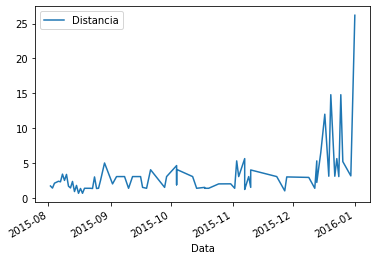

In [20]:
df.plot();

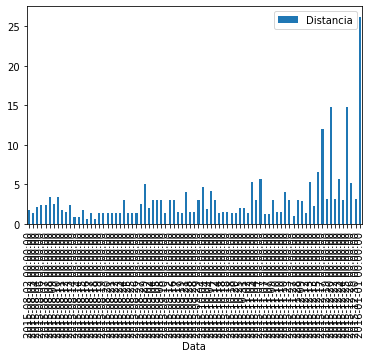

In [21]:
df.plot(kind = 'bar')
plt.show()

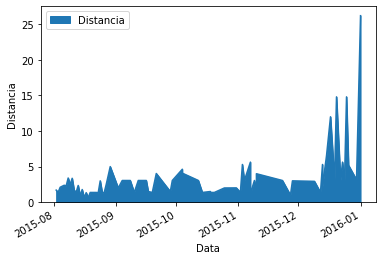

In [22]:
# Método .plot()  -> kind= vai receber o tipo de gráfico pretende-se usar
# plt.show() -> utilizado para printar o plot
# plt.ylabel -> indico o título do eixo.
df.plot(kind = 'area')
plt.ylabel('Distancia')
plt.show()

In [23]:
df['2015']

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN
...,...,...
2015-12-23,5.63,0:51:50
2015-12-24,3.05,0:25:08
2015-12-25,14.80,2:20:00


### 3.3 Pré-Processamento<a class="anchor" id="3.3"></a>
Tem por intuito realizar uma etapa de *feature engineering*, engenharia de atributo. **Criação de novas variáveis** importantes para análise.

[Índice](#0.1)

**1)** Adicionando uma coluna `Segundos` no dataFrame

In [24]:
# Para este caso: da coluna/variável/atributo "Tempo" realizaremos um split (separar em mais colunas).
# como tenho hora completa H:M:S, separaremos as informações.

# Função para converter a coluna de duração no tempo em segundos (alterando o ultimo paramento retorno o que quero)
def calcula_total_segundos(time):
    # se for NAN, retorna NAN
    if time is np.nan:
        return np.nan
    # senão, "splita"
    hrs, mins, seconds = str(time).split(':')
    seconds = int(seconds) + 60 * int(mins) + 60 * 60 * int(hrs)
    return seconds

Aplicando a função acima:

In [25]:
# df[nova coluna] recebe, o resultado da fç (calcula_total_segundos), aplicada pela fç Map, na coluna Tempo do dataFrame.
df['Segundos'] = df.Tempo.map(calcula_total_segundos)

In [26]:
df.describe()

,Distancia,Segundos
count,81.000000,52.000000
mean,3.137531,1901.788462
std,3.634519,2560.424171
min,0.650000,376.000000
25%,1.370000,583.750000
50%,2.100000,1343.500000
75%,3.050000,1743.250000
max,26.200000,15643.000000


**Dica**-> Python possui um comportamento de **não** considerar valores **NAN - vazio** nas estatísticas descritivas.

Observe no `count` que contabiliza apenas 52 observações para atributo `Segundos`. Iremos preencher com "0", **apenas em tempo** de exceução para mostrar a diferença quando **preenche** com um valor. 

PS. o preenchimento de valores faltantes (***Tratamento Missing Values***) é uma parte separada na fase de pré-processamento.

-> ver a porcentagem de valores ausentes
df.isnull().sum() / df.shape[0]

-> eliminar todas as entradas onde existam valores ausentes em (trade-off) sacrifica umas entradas em função de pontos missing.
eixo = 0 é direção de linhas
eixo = 1 é direção de colunas
df_clean = df.dropna(subset=['user_gender'], axis=0)

In [27]:
df

,Distancia,Tempo,Segundos
Data,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
...,...,...,...
2015-12-24,3.05,0:25:08,1508.0
2015-12-25,14.80,2:20:00,8400.0
2015-12-26,5.20,NaN,NaN


In [28]:
# fill(preenchimento) apenas em tempo de execução
df.fillna(0).describe()

,Distancia,Segundos
count,81.000000,81.000000
mean,3.137531,1220.901235
std,3.634519,2240.756985
min,0.650000,0.000000
25%,1.370000,0.000000
50%,2.100000,573.000000
75%,3.050000,1426.000000
max,26.200000,15643.000000


**2)** Adicionando uma coluna `Minutos` no dataFrame

In [29]:
# posso utilizar uma fç anonima, lambda, que roda apenas em tempo de execução
df['Minutos'] = df['Segundos'].map(lambda x: x / 60)

In [30]:
df.fillna(0).describe()

,Distancia,Segundos,Minutos
count,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354
std,3.634519,2240.756985,37.345950
min,0.650000,0.000000,0.000000
25%,1.370000,0.000000,0.000000
50%,2.100000,573.000000,9.550000
75%,3.050000,1426.000000,23.766667
max,26.200000,15643.000000,260.716667


**3)** Adicionando uma coluna `Min_Por_Km` no dataFrame

In [31]:
df['Min_Por_Km'] = df['Minutos'] / df['Distancia']

In [32]:
df.fillna(0).describe()

,Distancia,Segundos,Minutos,Min_Por_Km
count,81.000000,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354,4.959450
std,3.634519,2240.756985,37.345950,3.803856
min,0.650000,0.000000,0.000000,0.000000
25%,1.370000,0.000000,0.000000,0.000000
50%,2.100000,573.000000,9.550000,6.962963
75%,3.050000,1426.000000,23.766667,7.792350
max,26.200000,15643.000000,260.716667,10.000000


**4)** Visualização gráfica - **Conceito de Janela** (tempo específico de análise)
Usado quando tem-se informação de tempo

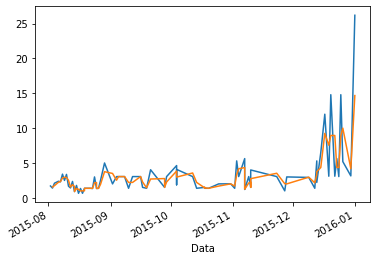

In [33]:
# Calculando a média de distância em uma janela (window) de 2 horas 
# comumente usada para análises em tempo real.

# python tem um método .rolling(window= "") que consigo trazer comparações em tempo real (janela de análise)


df['Distancia'].plot()
pd.Series(df['Distancia']).rolling(window = 2).mean().plot();

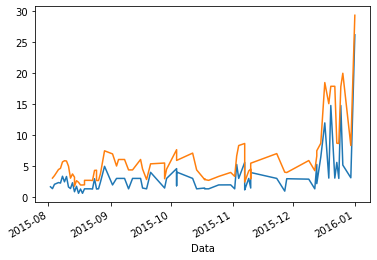

In [34]:
# Calculando a soma de distância em uma janela (window) de 2 horas

df['Distancia'].plot()
pd.Series(df['Distancia']).rolling(window = 2).sum().plot();

### 3.4 Reshape <a class="anchor" id="3.4"></a>
Tem por intuito observar os dados por uma outra perspectiva, agrupando os dados. O **GroupBy** tem a finalidade junta/agrupa os campos que são repetidos pelo parâmetro passado no agrupamento, se for númerico um dos campos pode-se usar as métricas estatísticas para esses grupos.


[Índice](#0.1)

In [35]:
cidadesDigitais = pd.read_csv('https://raw.githubusercontent.com/angeloBuso/dataSet_Geral/main/cidades_digitais.csv', sep = ';', encoding = 'latin-1')
cidadesDigitais.head()

,UF,CIDADE,IBGE,POPULAÇÃO,VALOR_TOTAL_PREVISTO,STATUS,PONTOS_ATENDIDOS,VALOR_INVESTIDO
0,AC,Tarauacá,1200609,38819,"484.547,53",Sem Previsão,8,0
1,AL,Delmiro Gouveia,2702405,51997,"1.169.381,70",Sem Previsão,43,0
2,AL,Estrela de Alagoas,2702553,18306,"527.206,83",Sem Previsão,39,0
3,AM,Autazes,1300300,37033,"1.171.151,92",Sem Previsão,51,0
4,AM,Benjamin Constant,1300607,39484,"844.586,48",Sem Previsão,12,0


**3.4.1** Pré-processamento dos dados <a class="anchor" id="3.4.1"></a>
etapa de ETL - limpeza e transformação:

    (i) Formatação: formato específico para alimentar ML.
    (ii) Limpeza: remover dados duplicados, tratar Missing*, remover caracteres especiais, tratar dados incompletos, definir #sigiloso #público.
    (iii) amostragem: decidir se trabalhar com conjunto total ou amostragem.
    
    
[Índice](#0.1)

In [36]:
# retorna quantas observações de cada varíavel encontrada
cidadesDigitais.count()

UF                      338
CIDADE                  338
IBGE                    338
POPULAÇÃO               338
VALOR_TOTAL_PREVISTO    338
STATUS                  338
PONTOS_ATENDIDOS        338
VALOR_INVESTIDO         338
dtype: int64

**3.4.2** Limpeza Dados <a class="anchor" id="3.4.2"></a>


[Índice](#0.1)

In [37]:
del cidadesDigitais['IBGE']
cidadesDigitais.head()

,UF,CIDADE,POPULAÇÃO,VALOR_TOTAL_PREVISTO,STATUS,PONTOS_ATENDIDOS,VALOR_INVESTIDO
0,AC,Tarauacá,38819,"484.547,53",Sem Previsão,8,0
1,AL,Delmiro Gouveia,51997,"1.169.381,70",Sem Previsão,43,0
2,AL,Estrela de Alagoas,18306,"527.206,83",Sem Previsão,39,0
3,AM,Autazes,37033,"1.171.151,92",Sem Previsão,51,0
4,AM,Benjamin Constant,39484,"844.586,48",Sem Previsão,12,0


**3.4.3** Transformações dos dados <a class="anchor" id="3.4.3"></a>
Dica: etapa que

    (i) fazemos decomposição - dividir uma variável que está com informação agrupadas em 2 ou mais variáveis.
    (ii) escala - colocamos dados na mesma escala entre 0 e 1.
    (iii) agregação - agrupamos informações, seja por contagem de instâncias, seja por --> Group-by <-- de variáveis.
    (iv) aplicamos reshape nos dados, se necessário
    
    
[Índice](#0.1)

**Boa Prática** instanciar novos dataSet agrupados em novas variáveis

In [38]:
cidadesUF_1 = cidadesDigitais.groupby('UF')

# esse novo obejto é um dataFrame GroupBy do Pandas, agrupado pela variável `UF` 
cidadesUF_1

**Atributo do GroupBy** ".groups" retorna uma estrutura de dicionário com o key:values, sendo key (objeto agrupado) values (indices do dataFrame representativos do objeto agrupado)

In [39]:
# Uma forma comum de usar goupBy é transfomando em dataFrames as consultas

# media = alunos.groupby('Sexo')
# md= pd.DataFrame(media['Notas'].mean().round(2))
# md.columns = ['Notas Médias']
# md

In [40]:
cidadesUF_1.groups

{'AC': [0], 'AL': [1, 2], 'AM': [3, 4, 5, 6, 7, 8, 9, 10, 11], 'AP': [12, 13, 14, 15, 16, 17], 'BA': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'CE': [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76], 'DF': [77], 'ES': [78, 79, 80, 81], 'GO': [82, 83, 84, 85, 86, 87, 88, 89, 90, 91], 'MA': [92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117], 'MG': [118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145], 'MS': [146, 147, 148], 'MT': [149, 150, 151, 152], 'PA': [153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176], 'PB': [177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194], 'PE': [195, 19

In [41]:
for key, value in cidadesUF_1:
    print(type(value))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pand

**Número de Grupos** funcão built-in python *len()*

In [42]:
len(cidadesUF_1.groups)

27

**Método GroupBy** ".size()" retorna o tamanho de cada objeto agrupado. Usando uma built-in, "*.sort_values(asc/desc)*" podemos ordenar pelo maior ou menor presença nos dados

In [43]:
cidadesUF_1.size().sort_values(ascending= False)

UF
SP    35
BA    33
MG    28
MA    26
CE    26
PA    24
PB    18
PI    18
PR    17
RS    16
PE    16
RJ    15
GO    10
AM     9
RN     9
AP     6
SC     6
SE     4
TO     4
MT     4
ES     4
MS     3
AL     2
RO     2
RR     1
DF     1
AC     1
dtype: int64

O Group By permite agrupar por mais de um atributo, basta neste caso passar uma **lista** dos atributos que iremos agrupar

In [44]:
cidadesUF_2 = cidadesDigitais.groupby(['UF', 'STATUS']); cidadesUF_2.head()

,UF,CIDADE,POPULAÇÃO,VALOR_TOTAL_PREVISTO,STATUS,PONTOS_ATENDIDOS,VALOR_INVESTIDO
0,AC,Tarauacá,38819,"484.547,53",Sem Previsão,8,0
1,AL,Delmiro Gouveia,51997,"1.169.381,70",Sem Previsão,43,0
2,AL,Estrela de Alagoas,18306,"527.206,83",Sem Previsão,39,0
3,AM,Autazes,37033,"1.171.151,92",Sem Previsão,51,0
4,AM,Benjamin Constant,39484,"844.586,48",Sem Previsão,12,0
...,...,...,...,...,...,...,...
321,SP,Penápolis,62071,"702.701,56",Concluída,21,0
334,TO,Paraíso do Tocantins,49076,"1.872.693,90",Sem Previsão,49,0
335,TO,Ponte Alta do Bom Jesus,4649,"251.266,44",Sem Previsão,9,"23.969,90"
336,TO,Porto Nacional,52182,"1.101.168,76",Sem Previsão,61,0


Usando o método *.size()*, visualizamos o tamanho de cada **critério múltiplo** agrupado.

PS. um comportamento observado em group-by multiplo é que quando ordemanos (sort_values) perdemos a multipla agrupamento.

In [45]:
cidadesUF_2.size()

UF  STATUS      
AC  Sem Previsão     1
AL  Sem Previsão     2
AM  Concluída        3
    Sem Previsão     6
AP  Concluída        1
    Sem Previsão     5
BA  Concluída        9
    Sem Previsão    24
CE  Concluída       11
    Sem Previsão    15
DF  Concluída        1
ES  Sem Previsão     4
GO  Sem Previsão    10
MA  Concluída        1
    Sem Previsão    25
MG  Concluída        2
    Em andamento     1
    Sem Previsão    25
MS  Sem Previsão     3
MT  Sem Previsão     4
PA  Concluída        9
    Sem Previsão    15
PB  Concluída        6
    Em andamento     3
    Sem Previsão     9
PE  Concluída        1
    Sem Previsão    15
PI  Concluída        3
    Sem Previsão    15
PR  Concluída        7
    Em andamento     1
    Sem Previsão     9
RJ  Concluída        1
    Em andamento     2
    Sem Previsão    12
RN  Concluída        1
    Sem Previsão     8
RO  Sem Previsão     2
RR  Sem Previsão     1
RS  Concluída        4
    Em andamento     2
    Sem Previsão    10
SC  Concluída    

Usar **índice** como critério de agrupamento, pode facilitar algumas **sumarizações**

**a)** Obtendo o índice necessário:

In [46]:
cidadesUF_3 =  cidadesDigitais.set_index('STATUS')
cidadesUF_3.head()

,UF,CIDADE,POPULAÇÃO,VALOR_TOTAL_PREVISTO,PONTOS_ATENDIDOS,VALOR_INVESTIDO
STATUS,,,,,,
Sem Previsão,AC,Tarauacá,38819,"484.547,53",8,0
Sem Previsão,AL,Delmiro Gouveia,51997,"1.169.381,70",43,0
Sem Previsão,AL,Estrela de Alagoas,18306,"527.206,83",39,0
Sem Previsão,AM,Autazes,37033,"1.171.151,92",51,0
Sem Previsão,AM,Benjamin Constant,39484,"844.586,48",12,0


**b)** Indicando um *GroupBy* por índice

In [47]:
cidadesUF_3 = cidadesUF_3.groupby(level= 'STATUS')

In [48]:
len(cidadesUF_3)

3

In [49]:
cidadesUF_3.groups

{'Concluída': ['Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída', 'Concluída'], 'Em andamento': ['Em andamento', 'Em andamento', 'Em andamento', 'Em andamento', 'Em an

Podemos definir **mais de um** índice e GroupBy, basta passar uma **lista** das variáveis que queremos como índice e GroupBy.

In [50]:
# A ordem é definida ao colocar as colunas na lista
cidadesUF_4 = cidadesDigitais.set_index(['UF', 'STATUS'])

In [51]:
# agrupo por level = indices
cidadesUF_4 = cidadesUF_4.groupby(level=['UF', 'STATUS'])
cidadesUF_4.head()

CIDADE  POPULAÇÃO VALOR_TOTAL_PREVISTO  \
UF STATUS                                                                  
AC Sem Previsão                 Tarauacá      38819           484.547,53   
AL Sem Previsão          Delmiro Gouveia      51997         1.169.381,70   
   Sem Previsão       Estrela de Alagoas      18306           527.206,83   
AM Sem Previsão                  Autazes      37033         1.171.151,92   
   Sem Previsão        Benjamin Constant      39484           844.586,48   
...                                  ...        ...                  ...   
SP Concluída                   Penápolis      62071           702.701,56   
TO Sem Previsão     Paraíso do Tocantins      49076         1.872.693,90   
   Sem Previsão  Ponte Alta do Bom Jesus       4649           251.266,44   
   Sem Previsão           Porto Nacional      52182         1.101.168,76   
   Sem Previsão  São Miguel do Tocantins      11597           592.549,70   

                 PONTOS_ATENDIDOS VALOR_INVESTIDO  
UF STATUS                                          
AC Sem Previsão                 8               0  
AL Sem Previsão                43               0  
   Sem Previsão                39               0  
AM Sem Previsão                51               0  
   Sem Previsão                12               0  
...                           ...             ...  
SP Concluída                   21               0  
TO Sem Previsão                49               0  
   Sem Previsão                 9       23.969,90  
   Sem Previsão                61               0  
   Sem Previsão                20               0  

[170 rows x 5 columns]

**Vantagem do GroupBy** é ao agrupar por uma ou "umas" variáveis, dos outros atributos **numéricos** podemos obter **sumarizações** e ainda customizar com o método **.aggregate([lista de funções])**

In [52]:
# cidadesUF_4.dtypes
cidadesUF_4.sum()

POPULAÇÃO  PONTOS_ATENDIDOS
UF STATUS                                   
AC Sem Previsão      38819                 8
AL Sem Previsão      70303                82
AM Concluída        205666                79
   Sem Previsão     204136               167
AP Concluída          4938                21
   Sem Previsão     107938                81
BA Concluída       1171174               155
   Sem Previsão     532445               559
CE Concluída        658927               218
   Sem Previsão     427514               370
DF Concluída         32148                15
ES Sem Previsão     122164                94
GO Sem Previsão     166045               168
MA Concluída        174267                13
   Sem Previsão     571514               566
MG Concluída         18579                16
   Em andamento      26897                27
   Sem Previsão     465789               533
MS Sem Previsão     118431                94
MT Sem Previsão      77241                97
PA Concluída        620301               189
   Sem Previsão     470578               435
PB Concluída        127879                95
   Em andamento      62733                61
   Sem Previsão     111071               185
PE Concluída         37317                14
   Sem Previsão     342519               297
PI Concluída         37987                45
   Sem Previsão     187556               213
PR Concluída        418078               134
   Em andamento      32639                 7
   Sem Previsão     284252               247
RJ Concluída         13626                11
   Em andamento     167465                35
   Sem Previsão     413049               312
RN Concluída          6218                13
   Sem Previsão      77814               145
RO Sem Previsão      84470                39
RR Sem Previsão      27288                21
RS Concluída        107356                73
   Em andamento      40954                30
   Sem Previsão     300041               265
SC Concluída         29008                18
   Sem Previsão     187416                90
SE Sem Previsão     187455               107
SP Concluída        235299               173
   Em andamento      62857                37
   Sem Previsão     898779               810
TO Sem Previsão     117504               139

In [53]:
cidadesUF_1['POPULAÇÃO'].aggregate(['min', 'max', 'sum']).rename(columns= {'min':'Mínimo', 'max':'Máximo', 'sum':'Total'})

,Mínimo,Máximo,Total
UF,,,
AC,38819,38819,38819
AL,18306,51997,70303
AM,18423,94175,409802
AP,4938,45712,112876
BA,4278,343230,1703619
CE,13188,221504,1086441
DF,32148,32148,32148
ES,24271,38850,122164
GO,3290,45243,166045


In [54]:
cidadesUF_4.aggregate([np.sum, np.mean, np.size]).rename(columns= {'sum':'Total', 'mean':'Média', 'size':'Qnt Obs'})

POPULAÇÃO                        PONTOS_ATENDIDOS             \
                    Total          Média Qnt Obs            Total      Média   
UF STATUS                                                                      
AC Sem Previsão     38819   38819.000000       1                8   8.000000   
AL Sem Previsão     70303   35151.500000       2               82  41.000000   
AM Concluída       205666   68555.333333       3               79  26.333333   
   Sem Previsão    204136   34022.666667       6              167  27.833333   
AP Concluída         4938    4938.000000       1               21  21.000000   
   Sem Previsão    107938   21587.600000       5               81  16.200000   
BA Concluída      1171174  130130.444444       9              155  17.222222   
   Sem Previsão    532445   22185.208333      24              559  23.291667   
CE Concluída       658927   59902.454545      11              218  19.818182   
   Sem Previsão    427514   28500.933333      15              370  24.666667   
DF Concluída        32148   32148.000000       1               15  15.000000   
ES Sem Previsão    122164   30541.000000       4               94  23.500000   
GO Sem Previsão    166045   16604.500000      10              168  16.800000   
MA Concluída       174267  174267.000000       1               13  13.000000   
   Sem Previsão    571514   22860.560000      25              566  22.640000   
MG Concluída        18579    9289.500000       2               16   8.000000   
   Em andamento     26897   26897.000000       1               27  27.000000   
   Sem Previsão    465789   18631.560000      25              533  21.320000   
MS Sem Previsão    118431   39477.000000       3               94  31.333333   
MT Sem Previsão     77241   19310.250000       4               97  24.250000   
PA Concluída       620301   68922.333333       9              189  21.000000   
   Sem Previsão    470578   31371.866667      15              435  29.000000   
PB Concluída       127879   21313.166667       6               95  15.833333   
   Em andamento     62733   20911.000000       3               61  20.333333   
   Sem Previsão    111071   12341.222222       9              185  20.555556   
PE Concluída        37317   37317.000000       1               14  14.000000   
   Sem Previsão    342519   22834.600000      15              297  19.800000   
PI Concluída        37987   12662.333333       3               45  15.000000   
   Sem Previsão    187556   12503.733333      15              213  14.200000   
PR Concluída       418078   59725.428571       7              134  19.142857   
   Em andamento     32639   32639.000000       1                7   7.000000   
   Sem Previsão    284252   31583.555556       9              247  27.444444   
RJ Concluída        13626   13626.000000       1               11  11.000000   
   Em andamento    167465   83732.500000       2               35  17.500000   
   Sem Previsão    413049   34420.750000      12              312  26.000000   
RN Concluída         6218    6218.000000       1               13  13.000000   
   Sem Previsão     77814    9726.750000       8              145  18.125000   
RO Sem Previsão     84470   42235.000000       2               39  19.500000   
RR Sem Previsão     27288   27288.000000       1               21  21.000000   
RS Concluída       107356   26839.000000       4               73  18.250000   
   Em andamento     40954   20477.000000       2               30  15.000000   
   Sem Previsão    300041   30004.100000      10              265  26.500000   
SC Concluída        29008   29008.000000       1               18  18.000000   
   Sem Previsão    187416   37483.200000       5               90  18.000000   
SE Sem Previsão    187455   46863.750000       4              107  26.750000   
SP Concluída       235299   29412.375000       8              173  21.625000   
   Em andamento     62857   31428.500000       2               37  18.500000   
   Sem Previsão 

### 3.5 EDA - Invidual dos dados <a class="anchor" id="3.5"></a>

Tem por objetivo, após uma visão geral dos dados ou por outra ótica (Reshape) "colocar uma lupa" em variáveis consideradas importantes. Nesta etapa os objetivos são:
* separar as variáveis explanatórias da variável target
* verificar dados ausentes
* da variável target:
    * ver seu tipo, compreender sua distribuição, compreender suas estatísticas (amplitude, kurtose, balanceamento, correlações)
    * plots - análise visual da variável target
* das variáveis explicatórias, compreender quem:
    * é explanatória numérica (suas correlações, plots, relações com a variável alvo, multicolinearidade, distribuição dos dados)
    * é explanatória categórica (sua tabela de frequência absoluta e relativa)
    
    
[Índice](#0.1)

**3.5.1** Slicing/Filtro por atributo <a class="anchor" id="3.5.1"></a>

Análise de uma variável ou uma "porção" delas, devemos fazer filtros/slicing do dataSet, no intuito de obter os dados no formato necessário.


[Índice](#0.1)

* **a)** método **.isin()** de uma `[lista]` passada como parâmetos, retorna apenas os dados `True` dessa consulta.
* **b)** usando um seletor: *(i)* cria um objeto seletor `seletor = (dF[] <>== ?)|&(df[]== >< ?)`; *(ii)* aplica o `seletor` ao dataFrame.
* **c)** métolo dataFrame. `**loc**[()|() , [] ]`

**a)** método `isin()`

In [55]:
dados = pd.read_csv('https://raw.githubusercontent.com/angeloBuso/dataSet_Geral/main/aluguel.csv', sep= ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [56]:
# dados.Tipo.unique()
# list(dados.Tipo.drop_duplicates())

In [57]:
# (i) criando a lista dos itens escolhidos
residencial = ['Quitinete',
               'Casa',
               'Apartamento',
               'Casa de Condomínio',
               'Casa de Vila']

In [58]:
# (ii) usando slicing, filtramos
dados[dados.Tipo.isin(residencial)]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


**b)** Seletor

In [59]:
# (i) instanciando um seletor & "e" | "ou"
seletor = (dados['Tipo'] == 'Quitinete') | (dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Apartamento') | (dados['Tipo'] == 'Casa de Condomínio')| (dados['Tipo'] == 'Casa de Vila')

In [60]:
# (ii) usando slicing, filtramos
dados[seletor]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


**c)** Usando loc()

In [61]:
dados.loc[(dados.Tipo.isin(residencial), ['Bairro', 'Quartos'])]

,Bairro,Quartos
0,Copacabana,1
1,Jardim Botânico,2
3,Centro,1
4,Higienópolis,1
5,Vista Alegre,3
...,...,...
32953,Méier,2
32955,Centro,0
32956,Jacarepaguá,3
32957,São Francisco Xavier,2


**3.5.2** Visual por atributo <a class="anchor" id="3.5.2"></a>

Temos por objetivo, de forma visual observar alguns comportamentos


[Índice](#0.1)

In [62]:
# Importando os pacotes 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [63]:
# Carregando o dataset
df = pd.read_csv("https://raw.githubusercontent.com/angeloBuso/dataSet_Geral/main/Dados-Pesquisa.csv", sep = ',', low_memory=False)
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


**3.5.2.1** Distribuição de Idade


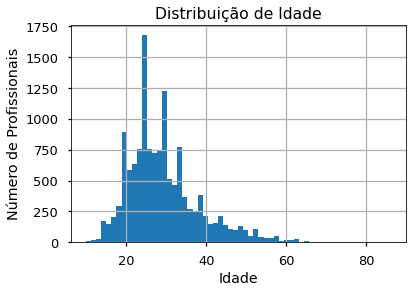

In [64]:
# Qual a distribuição de idade dos participantes da pesquisa?
# A maioria dos profissionais que trabalham como programadores de 
# software estão na faixa de idade entre 20 e 30 anos, sendo 25 anos 
# a idade mais frequente.

# Gerando um histograma
df.Age.hist(bins = 60)
plt.xlabel("Idade")
plt.ylabel("Número de Profissionais")
plt.title("Distribuição de Idade")
plt.show()

**3.5.2.2** Distribuição de Sexo

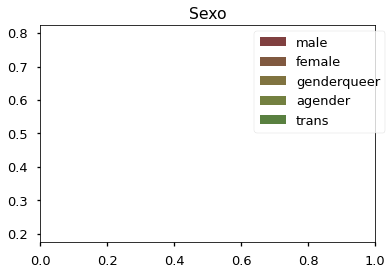

In [65]:
# Qual é a distribuição de sexo dos participantes da pesquisa?
# A grande maioria dos programadores é do sexo masculino

# Definindo a quantidade
labels = df.Gender.value_counts().index
num = len(df.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Pizza
fatias, texto = plt.pie(df.Gender.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title("Sexo")
plt.show()

**3.5.2.3** Distribuição de Interesses

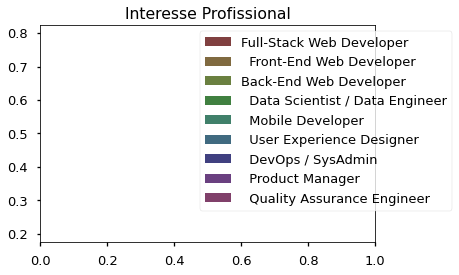

In [66]:
# Quais sãos os principais interesses dos participantes da pesquisa?
# O principal interesse profissional dos programadores é o desenvolvimento web (Full-Stack, Front-End e Back-End), 
# seguido pela área de Data Science.

# Definindo a quantidade
num = len(df.JobRoleInterest.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = df.JobRoleInterest.value_counts().index
colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'black', 'Maroon', 'LightSlateGrey', 'DimGray']

# Gráfico de Pizza
fatias, texto = plt.pie(df.JobRoleInterest.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.25, 1))
plt.title("Interesse Profissional")
plt.show()

**3.5.2.4** Distribuição de Empregabilidade

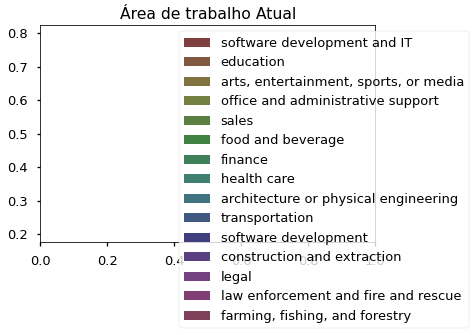

In [67]:
# Quais as áreas de negócio em que os participantes da pesquisa trabalham?
# A maioria dos programadores trabalha na área de desenvolvimento de 
# softwares e TI, mas outras áreas como finanças e saúde também são 
# significativas.

# Definindo a quantidade
num = len(df.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = df.EmploymentField.value_counts().index

# Gráfico de Pizza
fatias, texto = plt.pie(df.EmploymentField.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.3, 1))
plt.title("Área de trabalho Atual")
plt.show()

**3.5.2.5** Preferências de Trabalho por Idade

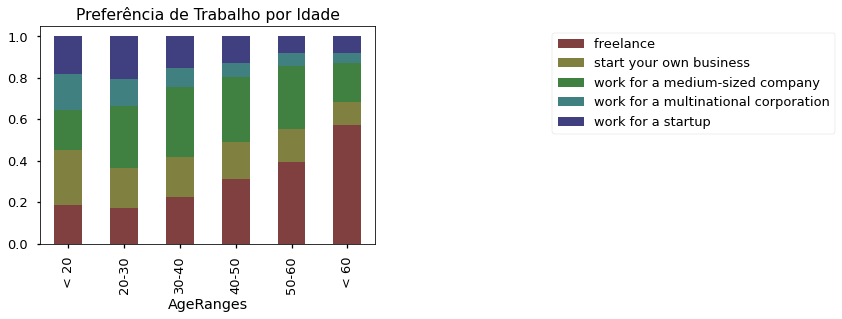

In [68]:
# Quais são as preferências de trabalho por idade?
# Perceba que à medida que a idade aumenta, o interesse por trabalho 
# freelance também aumenta, sendo o modelo preferido por profissionais 
# acima de 60 anos. Profissionais mais jovens preferem trabalhar em 
# Startups ou no seu próprio negócio. Profissionais entre 20 e 50 anos 
# preferem trabalhar em empresas de tamanho médio.

# Agrupando os dados
df_ageranges = df.copy()
bins=[0, 20, 30, 40, 50, 60, 100]

df_ageranges['AgeRanges'] = pd.cut(df_ageranges['Age'], 
                                   bins, 
                                   labels=["< 20", "20-30", "30-40", "40-50", "50-60", "< 60"]) 

df2 = pd.crosstab(df_ageranges.AgeRanges, 
                  df_ageranges.JobPref).apply(lambda r: r/r.sum(), axis=1)

# Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = df2.plot(kind = "bar", stacked = True, color = listaRGB, title = "Preferência de Trabalho por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1));

**3.5.2.6** Realocação por Idade

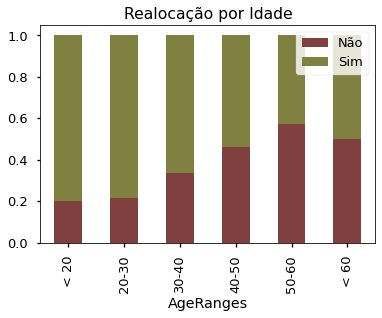

In [69]:
# Qual o objetivo de realocação?
# A vontade de buscar um novo emprego diminui com a idade. 
# Quase 80% das pessoas abaixo dos 30 anos estão preparadas para isso.

# Agrupando os dados
df3 = pd.crosstab(df_ageranges.AgeRanges, 
                  df_ageranges.JobRelocateYesNo).apply(lambda r: r/r.sum(), axis = 1)

# Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = df3.plot(kind = "bar", stacked = True, color = listaRGB, title = "Realocação por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["Não", "Sim"], loc = 'best');

**3.5.2.7** Idade x Horas de Aprendizagem

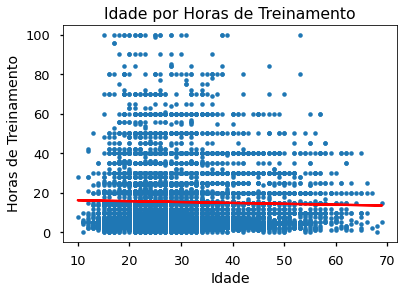

In [70]:
# Qual a relação entre idade e horas de aprendizagem?
# A idade dos profissionais não afeta a quantidade de tempo gasto com capacitação e treinamento.

import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados
df9 = df.copy()
df9 = df9.dropna(subset=["HoursLearning"])
df9 = df9[df['Age'].isin(range(0,70))]

# Definindo os valores de x e y
x = df9.Age
y = df9.HoursLearning

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Horas de Treinamento")
plt.title("Idade por Horas de Treinamento")
plt.show()

**3.5.2.8**  Investimento em Capacitação x Expectativa Salarial

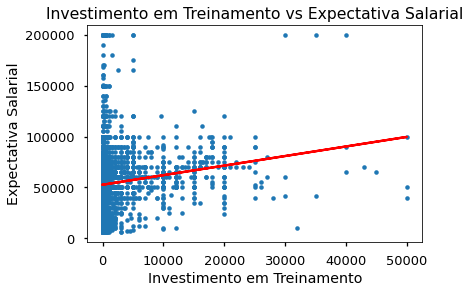

In [71]:
# Qual a relação entre investimento em capacitação e expectativa salarial?
# Os profissionais que investem tempo e dinheiro em capacitação e 
# treinamento, em geral, conseguem salários mais altos, embora alguns 
# profisisonais esperem altos salários, investindo 0 em treinamento.

import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados
df5 = df.copy()
df5 = df5.dropna(subset=["ExpectedEarning"])
df5 = df5[df['MoneyForLearning'].isin(range(0,60000))]

# Definindo os valores de x e y
x = df5.MoneyForLearning
y = df5.ExpectedEarning

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Investimento em Treinamento")
plt.ylabel("Expectativa Salarial")
plt.title("Investimento em Treinamento vs Expectativa Salarial")
plt.show()

_____

_____

## 4. Pré-Processamento dados <a class="anchor" id="4"></a>
Muitos algoritmos esperam receber os dados em um formato específico. É seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que você está utilizando.
É muito provável que você tenha que realizar tarefas de pré-processamento nos dados. Esse é um passo necessário dentro do processo. O desafio é o fato que cada algoritmo requer uma estrutura diferente, o que pode requerer transformações diferentes nos dados. Mas é possível em alguns casos, obter bons resultados sem um trabalho de pré-processamento. Mas é uma boa prática criar diferentes visões e transformações dos dados, de modo a poder testar diferentes algoritmos de Machine Learning.

[Índice](#0.1)

### 4.1 Transformação de Atributos <a class="anchor" id="4.1"></a>

(verificação de valores Missing; Alteração do tipo de dados na carga...)

ALTERAR NOMES DE COLUNAS:  i. (a) crio uma lista com nomes, (b) aplico usando o atributo .columns, atribuindo a lista de nomes

                           ii. dados = dados.rename(columns={'OldName': 'NewOld', 'OldName': 'NewOld'})

ALTERANDO INDICES:         dataSet.set_index('Coluna', (se data)inplace = True)

INCLUINDO NOVA COLUNA:     i. dataSet[novacoluna]= dataSet[coluna].map(lambda x: função)

                           ii. dataSet[novacoluna] = dataSet.ColunaExistente.map(funçãoqueCriou)
                           
EXCLUSÃO ATRIBUTO SEM RELEVÂNCIA: data= data.drop(columns= (vetor de colunas à exluir))

TRANSFORMANDO STRING EM NÚMEROS / VICE-VERSA:  i. dict = {'no':0,'yes':1}
                                               ii. dataSet[coluna] = dataSet[coluna].map(dict)


[Índice](#0.1)

### 4.2 Feature Scaling <a class="anchor" id="4.2"></a> 

[Índice](#0.1)

#### 4.2.1 Logarítmo <a class="anchor" id="4.2.1"></a> 
Aplicação: Template-4LMMultipla-Regularizacao-Conceito

[Índice](#0.1)

#### 4.2.2 Nomalização <a class="anchor" id="4.2.2"></a> 
técnicas: sklearn.preprocessing import (i) MinMaxScaler e (ii) Normalizer

Útil para conjuntos de dados esparsos (muitos zeros) com atributos de escalas variadas ao usar algoritmos que ponderam valores de entrada, como redes neurais e algoritmos que usam medidas de distância,

[Índice](#0.1)

##### 4.2.2.1 MinMaxScaler <a class="anchor" id="4.2.2.1"></a> 
[Índice](#0.1)

##### 4.2.2.2 Normalizer <a class="anchor" id="4.2.2.2"></a> 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

[Índice](#0.1)

##### 4.2.2.3 Pela média dataSet <a class="anchor" id="4.2.2.3"></a> 
[Índice](#0.1)

#### 4.2.3 Padronização <a class="anchor" id="4.2.3"></a> 
técnicas: sklearn.preprocessing import (i) StandardScaler

Útil para algorítimos que  pressupõem  uma  distribuição  gaussiana  nas variáveis de entrada e funcionam melhor com dados reescalonados, como regressão linear, regressão logística e análise discriminante linear

[Índice](#0.1)

#### 4.2.4 Binarização <a class="anchor" id="4.2.4"></a>
técnicas: sklearn.preprocessing import (i) Binarizer

Transformar seus dados usando um limite binário. Todos os valores acima do limite são marcados como 1 e todos iguais ou inferiores são marcados como 0. Útil quandovocê tem  probabilidades

[Índice](#0.1)

### 4.3 Feature Engineer <a class="anchor" id="4.3"></a>
#### 4.3.1 Dummies <a class="anchor" id="4.3.1"></a>
Técnica de entregar a var_Categóricas, formato numérico sem perder representação da informação

[Índice](#0.1)

#### 4.3.2 Imputação Missing <a class="anchor" id="4.3.2"></a>

[Índice](#0.1)

### 4.4 Feature Selection - Dimensionalidade <a class="anchor" id="4.4"></a> 
Alta dimensionalidade gera problema de alta variância, tornando modelo não generalizável; Deve-se ater a seleção dos melhores atributos; Espera-se que os dados já estejam **normalizado** e/ou **padronizados**

técnicas: sklearn.feature_selection import (i) SelectKBest, (ii) RFE e sklearn.ensemble import (iii) ExtraTreesClassifier

#### 4.4.1 Seleção Univariada <a class="anchor" id="4.4.1"></a> 
##### 4.4.1.1 SelectKBest <a class="anchor" id="4.4.1.1"></a> 
Testes estatisticos usados para indicar quais atrtibutos apresentam forte relação com a var_target (constroe modelos adicionando um a um cada atributo)
(i) SelectKBest

[Índice](#0.1)

##### 4.4.1.2 RFE <a class="anchor" id="4.4.1.2"></a> 
Constrõe o modelos com todos os atributos, vai eliminando um a um, utilizando a acurácia para comparar a cada eliminação
(ii) RFE

[Índice](#0.1)

#### 4.4.2 Regularização <a class="anchor" id="4.4.2"></a> 
Indicado para regressores

[Índice](#0.1)

#### 4.4.3 PCA <a class="anchor" id="4.4.3"></a> 
PCA exige dados normalizados

[Índice](#0.1)

#### 4.4.4 Métodos Ensemble <a class="anchor" id="4.4.4"></a> 
Usam algoritmos Ensemble para indicar as melhores variáveis/atributos

[Índice](#0.1)

### 4.5 Split dados <a class="anchor" id="4.5"></a> 
   
técnicas: sklearn.model_selection import (i) train_test_split-estático e (ii) Cross-validation-randômico

[Índice](#0.1)

#### 4.5.1 Estático - nível linha <a class="anchor" id="4.5.1"></a>

[Índice](#0.1)

#### 4.5.2 Cross Validation - K folds <a class="anchor" id="4.5.2"></a>

[Índice](#0.1)

= output: dados pré-processados e splitados para iniciar a construção do modelo de ML

## 5. Seleção Algoritmo <a class="anchor" id="5"></a> 
Dado o problema de negócio, a seleção do algoritmo se dá pelo modelo que apresentou melhor performance, sendo assim temos que treinar o algoritmo, testar e validar. Logo podemos utilizar (i) individualizar/automatizar modelos de algoritmos de ML ou (ii) usar algoritmos tipo ensemble.

[Índice](#0.1)

#### (i) individualizar/automatizar

## 5.1 (i) - individualizado (split estático) <a class="anchor" id="5.1.i"></a>

[Índice](#0.1)

#### 5.1.1 criar modelo <a class="anchor" id="5.1.1.i"></a>
#### 5.1.2 treino modelo (.fit) <a class="anchor" id="5.1.2.i"></a>
#### 5.1.3 teste modelo (.predict) <a class="anchor" id="5.1.3.i"></a>
#### 5.1.4 performance modelo (.score) <a class="anchor" id="5.1.4.i"></a>

[Índice](#0.1)

### 5.1 (i) - automatizado (split randômico) <a class="anchor" id="5.1.ii"></a>

[Índice](#0.1)

#### 5.1.1 identificar os estimadores (dentro do mesmo tipo de problema) <a class="anchor" id="5.1.1.ii"></a>
#### 5.1.2 cross-Validation (.fit/.predict/.score) <a class="anchor" id="5.1.2.ii"></a>

[Índice](#0.1)

### 5.2 (ii) - algoritmos tipos ensembles (split randômico) <a class="anchor" id="5.2"></a>
Existem 3 tipos de algoritmos tipo ensembles (i)Bagging: BaggingClassifier/RandomForestClassifier, (ii)Boosting AdaBoostClassifier/GradientBoostingClassifier/XGBClassifier e (iii)Voting VotingClassifier
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

[Índice](#0.1)

#### 5.2.1 identificar os estimadores ensemble <a class="anchor" id="5.2.1"></a>
#### 5.2.2 cross-Validation (.fit/.predict/.score) <a class="anchor" id="5.2.2"></a>

[Índice](#0.1)

## 6. Otimização Modelo <a class="anchor" id="6"></a>
Tuning modelo -> do melhor modelo ajusta-se os hyperparâmetros (conjuto de parâmetros do modelo)

[Índice](#0.1)

### 6.1 Escolha dos melhores parâmetros do algoritmo de ML <a class="anchor" id="6.1"></a>
Escolha dos valores a serem testados, dado a documentação de cada algorítmo
valore_grid = {parametro:[valores], parametro:[valores] }

técnicas: sklearn.model_selection import (i) GridSearchCV e (ii) RandomizedSearchCV

[Índice](#0.1)

### 6.2 Estimando valores dos HyperParâmetros <a class="anchor" id="6.2"></a>

[Índice](#0.1)

## 7. Salvando Modelo Treinado <a class="anchor" id="7"></a>

[Índice](#0.1)

In [72]:
# arquivo = 'modelos/modelo_regressor_final.sav'
# pickle.dump(modelo, open(arquivo, 'wb'))
# print("Modelo salvo!")

# # Carregando o arquivo
# modelo_regressor_final = pickle.load(open(arquivo, 'rb'))
# print("Modelo carregado!")